# Comparison of automatic libraries with traditional approaches of data science



## Import Libraries




In [ ]:
# !pip install sweetviz
#uncomment the above to install the library

# !pip install auto-sklearn
#uncomment the above to install the library

In [ ]:
# !pip install --upgrade scipy

In [ ]:
# pip install --upgrade scikit-learn

In [ ]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
import autosklearn.classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.patches as mpatches
import random
import scipy.stats as stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [ ]:
# loading the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA

The following section is purely dedicated to understanding the data. Each block of code will be followed by its explanation and how it answers the questions laid out.

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


From the above output we can visualise the dataframes, its various features and the type of data in each feature

In [ ]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Sweetviz

                                             |          | [  0%]   00:00 -> (? left)


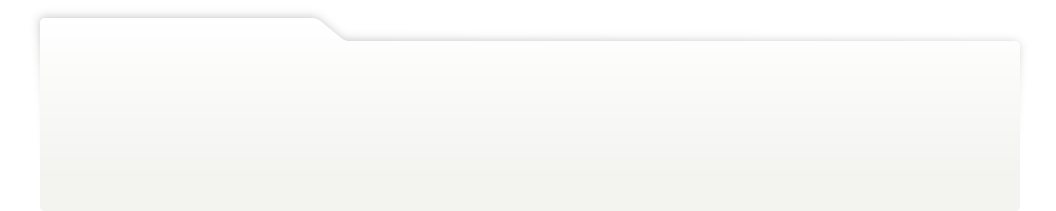
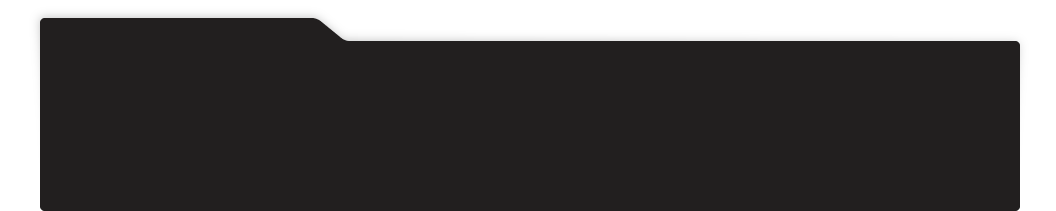
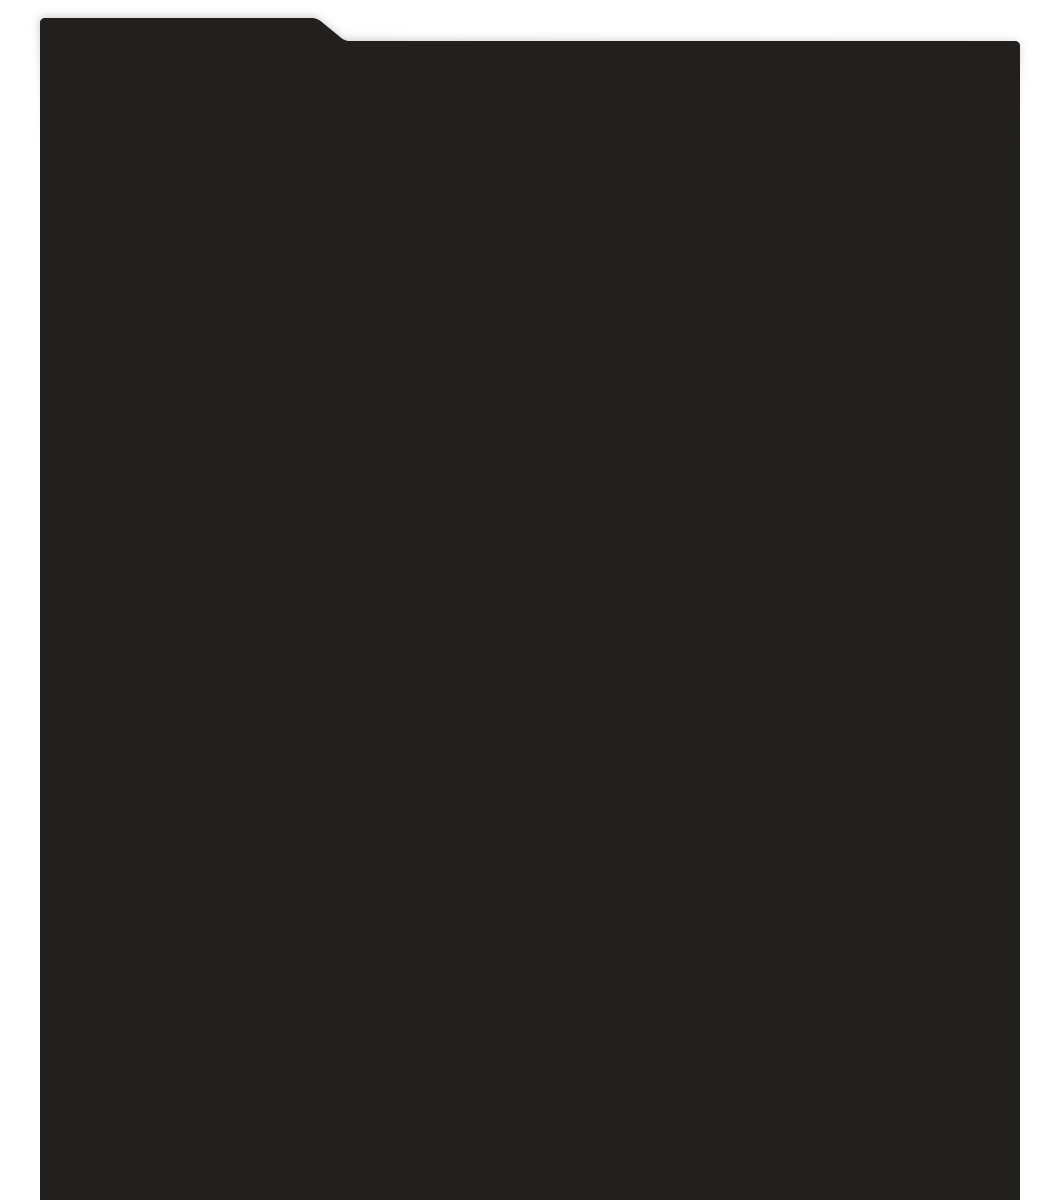
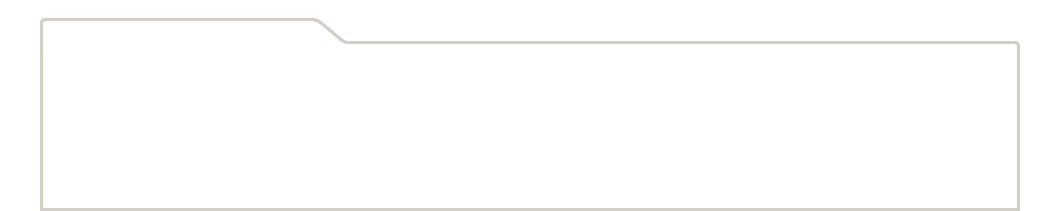
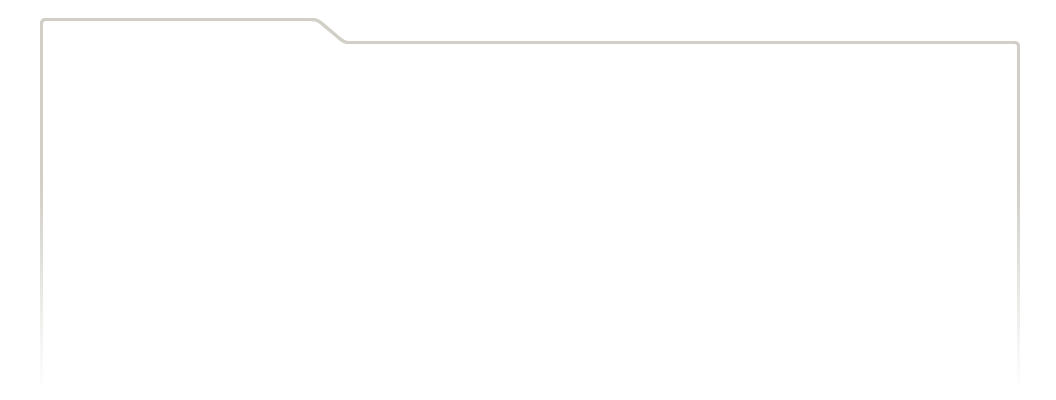
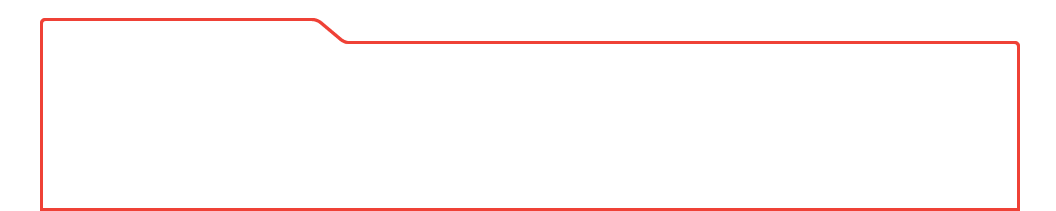
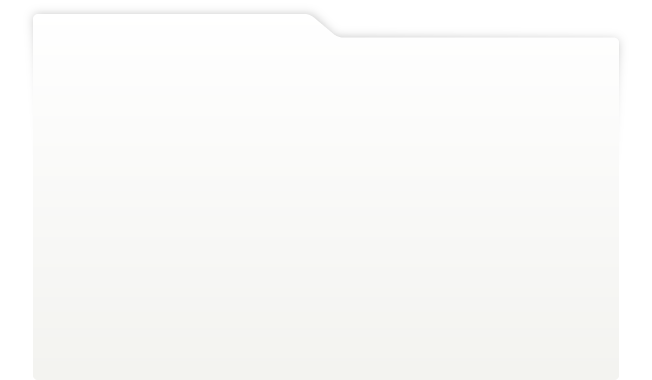
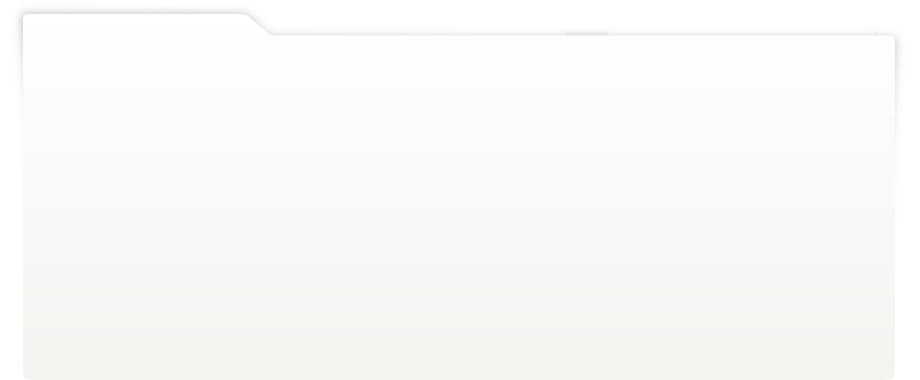
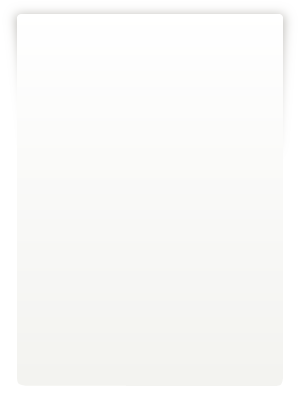
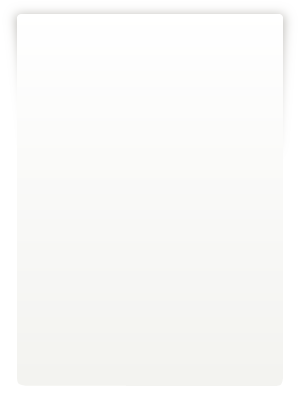
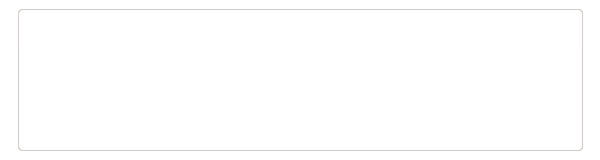
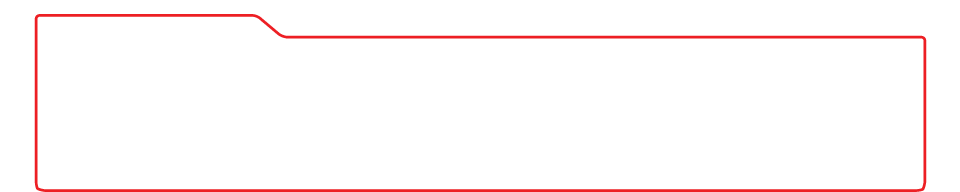
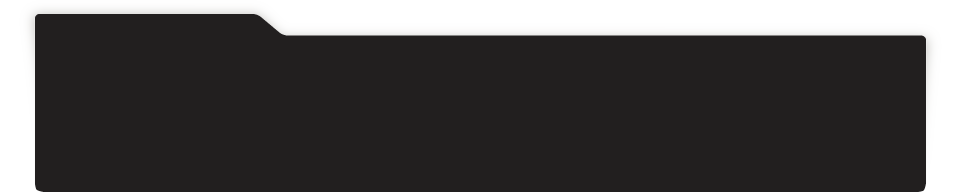
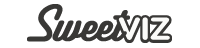
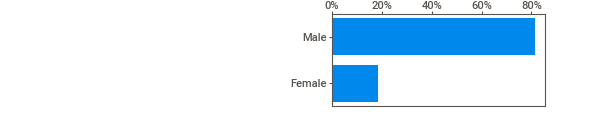
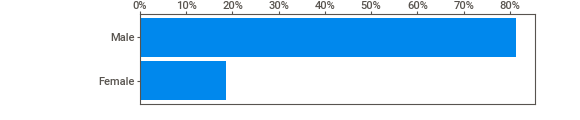
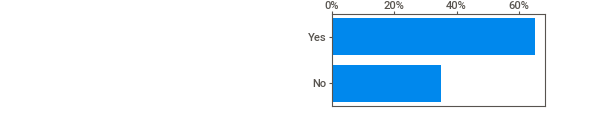
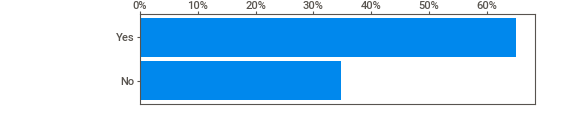
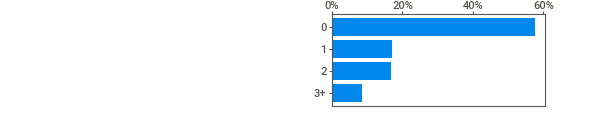
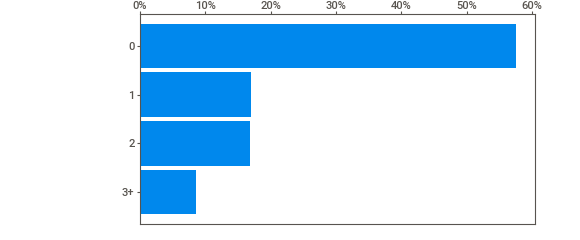
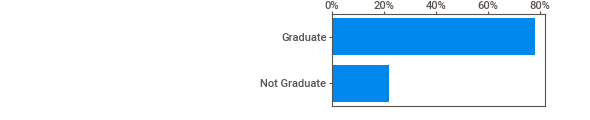
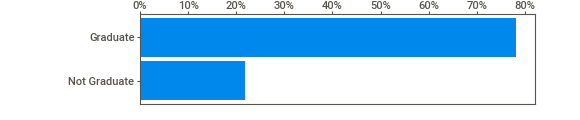
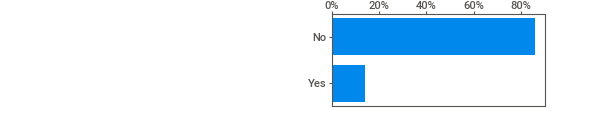
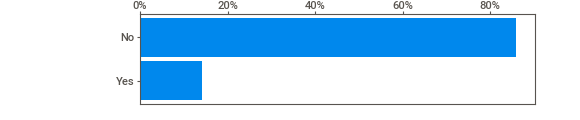
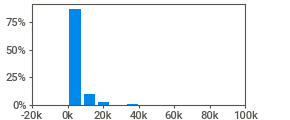
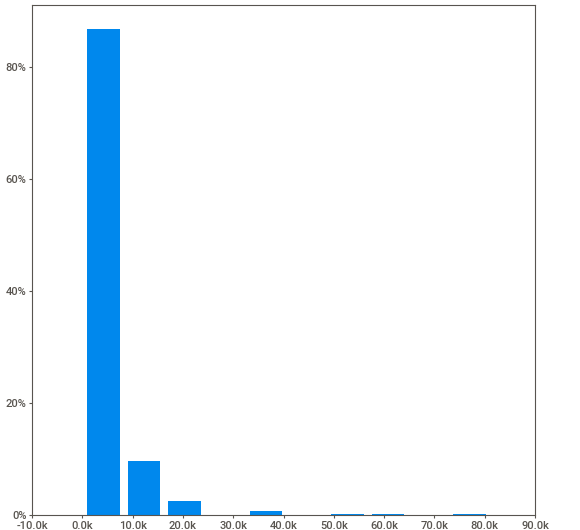
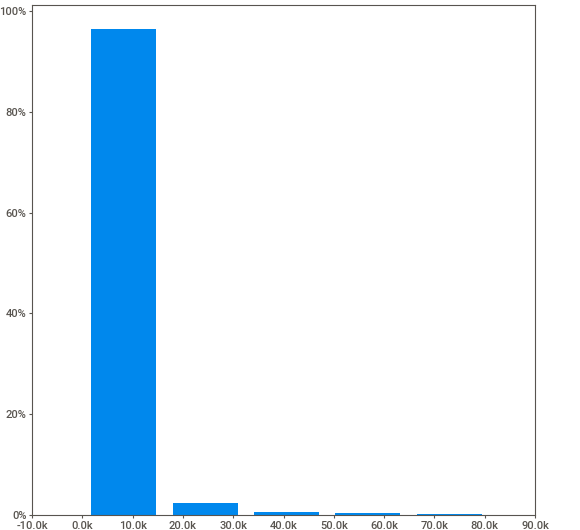
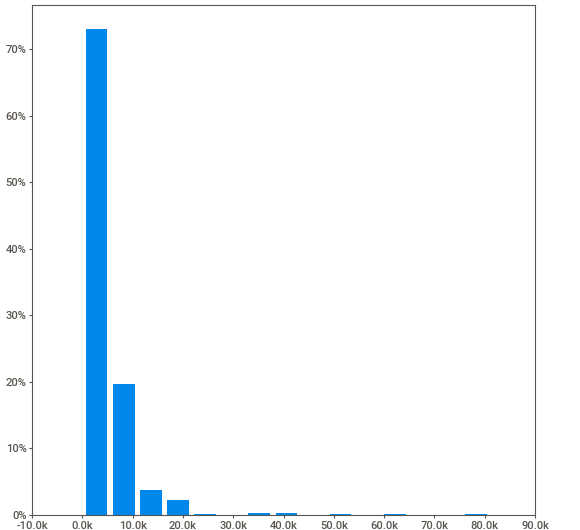
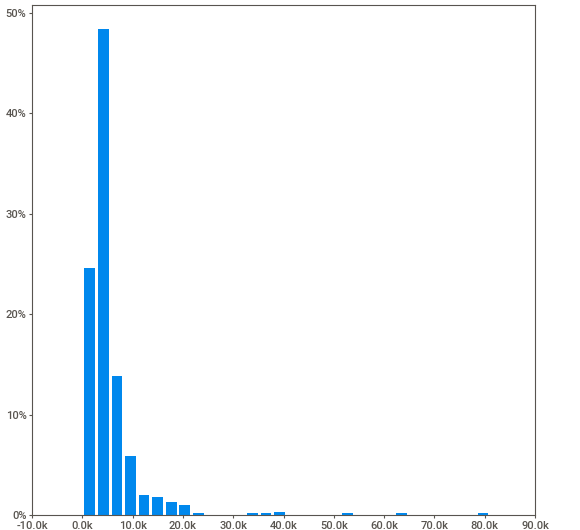
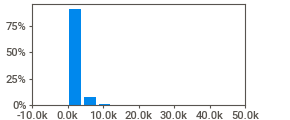
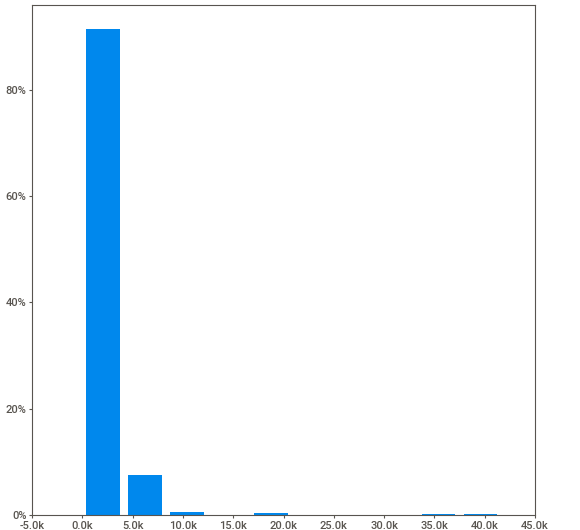
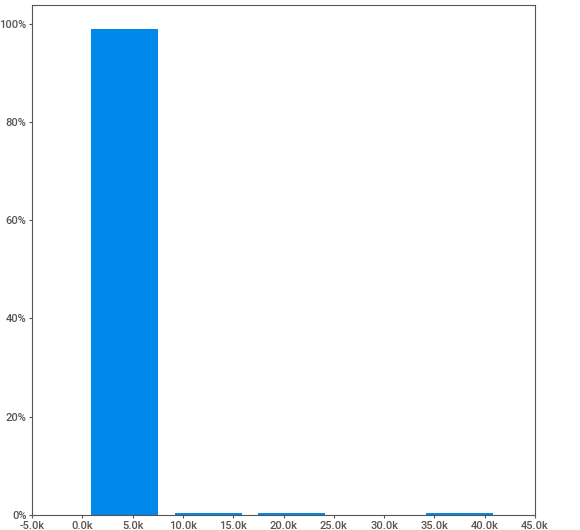
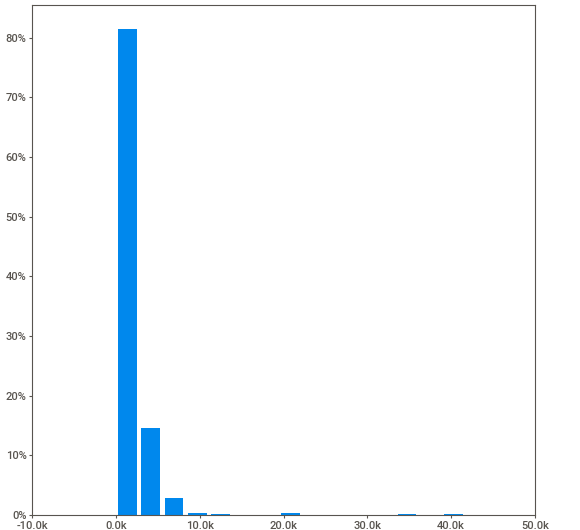
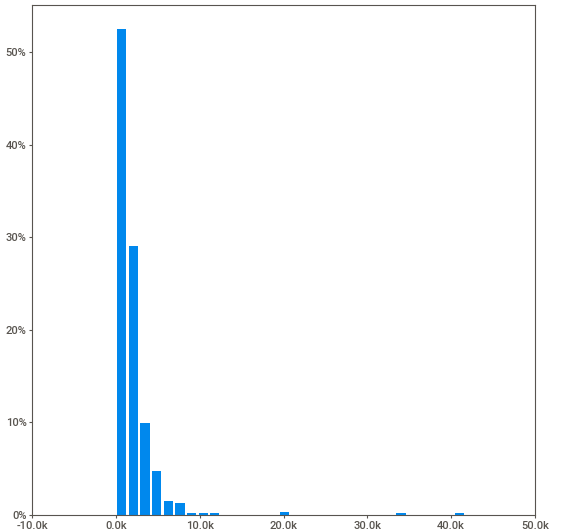
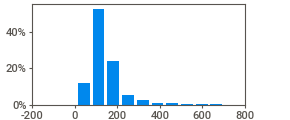
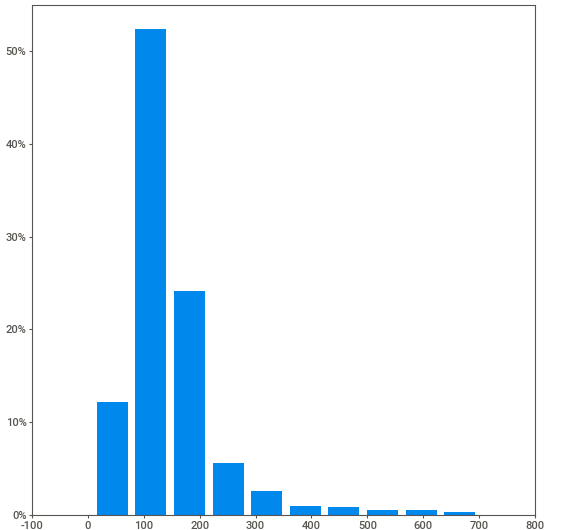
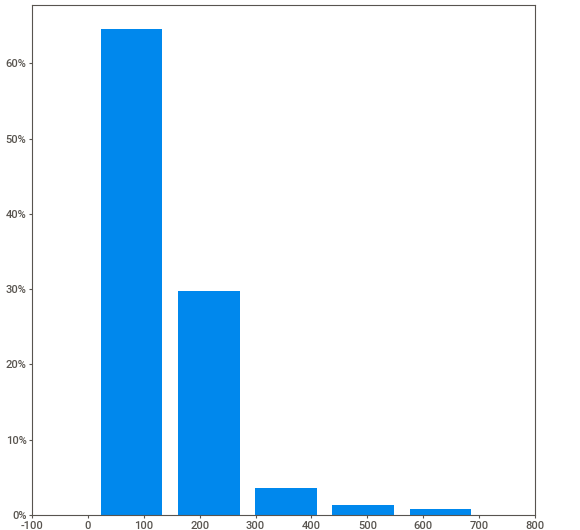
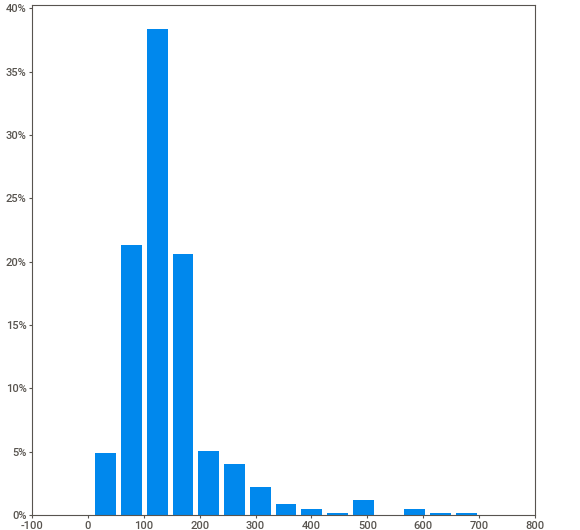
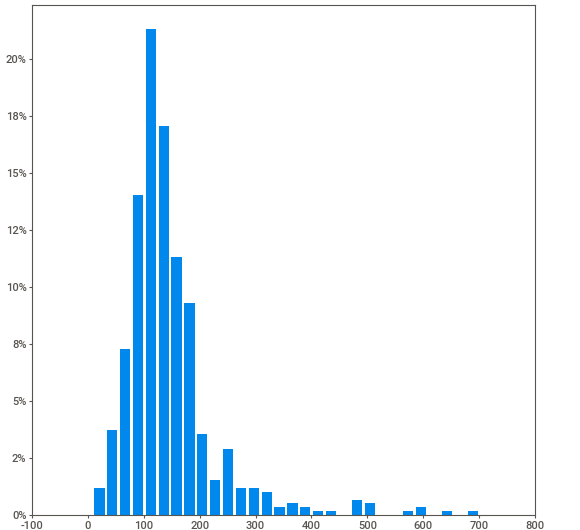
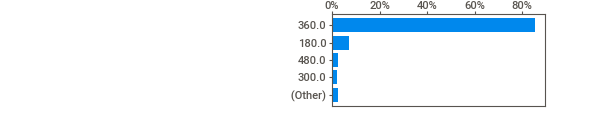
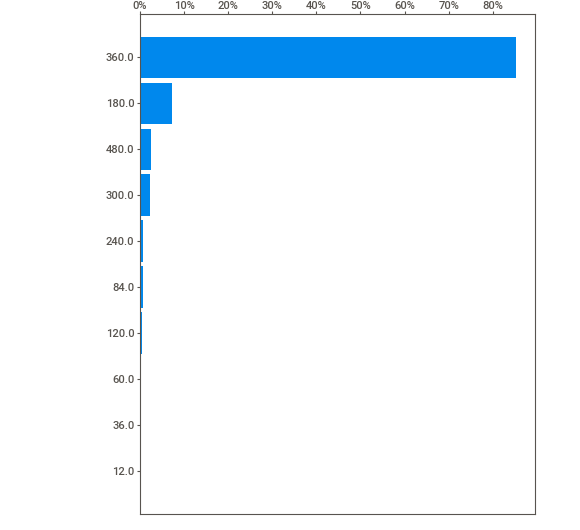
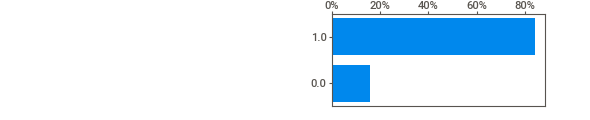
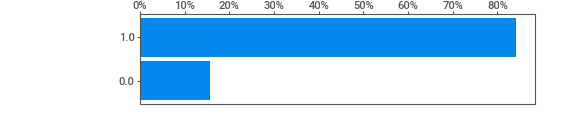
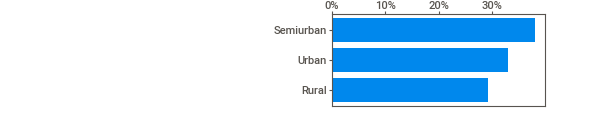
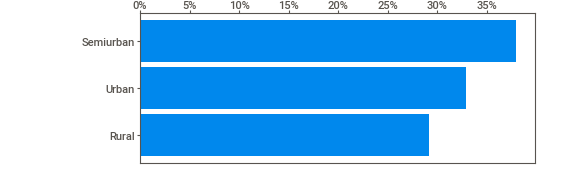
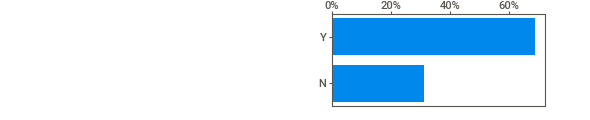
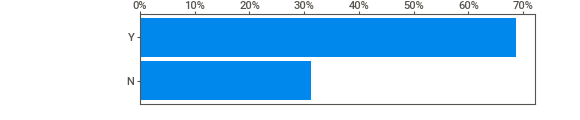
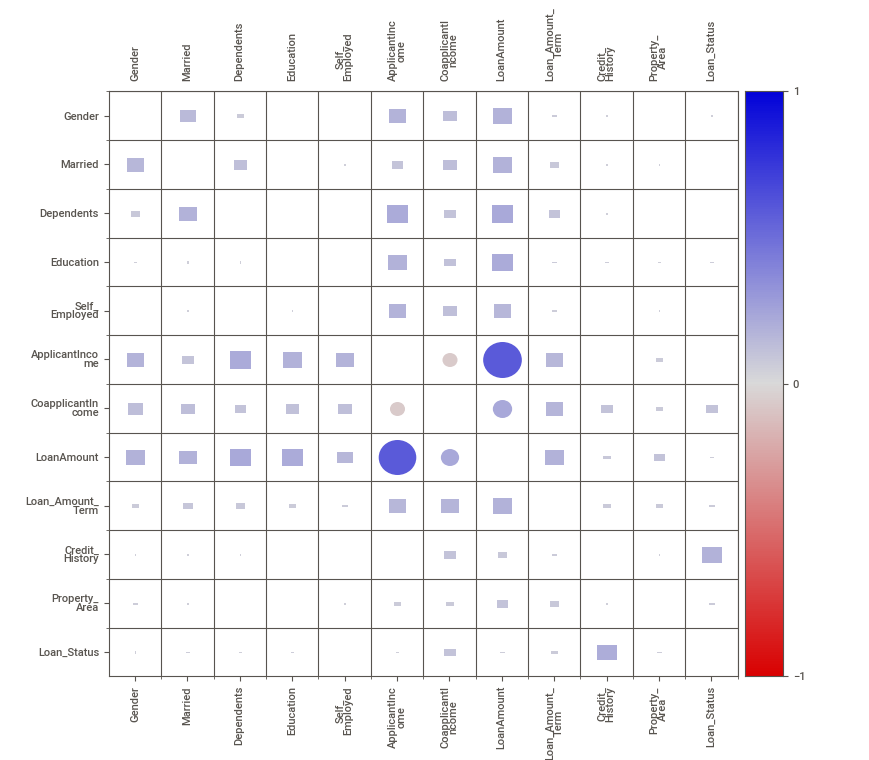
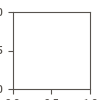

In [ ]:
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

SweetViz is a good auto EDA library that provides a consoliated report of the whole dataset.

### Traditional EDA

The cell below demonstrates the data type of each feature. Here an 'object' dtype refers to a string value. As the features in both the train and test sets are same, the data types are same as well

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Next we want to have an overview of the datasets. The describe function is useful for that. It provides us with various properties of each feature such as the number of samples (count), number of unique samples (unique), the most frequently appearing sample in feature and its frequency in the dataset (top & freq) and other statistical features such as mean, standard deviation, quartiles, minimum and maximum. Statistical values for the string type features are missing (appearing as NaN) which is expected, while NaNs in the numerical fields denote missing data points. We can infer missing data points by observing different values in the count field as well.

In [ ]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
test.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


The following cell determines exactly how many data points are missing from each feature in both the datasets. From the output above, we know there are a total of 614 samples in the train dataset whereas the test dataset contains 367 samples.

In [ ]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

We also want to know if there are any duplicate rows. The cells below demonstrate that there are no duplicates in either datasets.

In [ ]:
train[train.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
test[test.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


Even though the visualisations in Sweetviz are comprehensive, they lack the flexibility that custom visualisations have. Below are my functions for data visualisations like one would see on a BI dashboard.

In [ ]:
categorical_features = sorted(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']) + ['Loan_Amount_Term']
continuous_features = sorted(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [ ]:
def visualise_categorical(df, cat_features):
    rows = 2
    columns = 4
    fig, ax = plt.subplots(rows, columns, figsize=(16,8))

    # for id, feature in enumerate(cat_features):
    for row in range(rows):
        for column in range(columns):
            # try:
            feature = cat_features[(columns*row)+column]

            if feature!='Loan_Amount_Term':

                for_pie = Counter(df[feature].astype('string').fillna('NA'))

                for_pie = dict(sorted(for_pie.items()))
                categories = list(for_pie.keys())
                sizes = list(for_pie.values())


                _, labels, autotexts = ax[row,column].pie(sizes, labels=categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("colorblind"))

                for label, autotext in zip(labels, autotexts):

                    label.set_fontsize(11)
                    autotext.set_fontsize(11)

                    autotext.set_color('white')

            else:

                for_bar = Counter(df[feature].astype('string').fillna('NA'))
                for_bar = dict(sorted(for_bar.items(), key=lambda x: x[1], reverse=True))

                ax[row,column].bar(list(for_bar.keys()), list(for_bar.values()))
                ax[row,column].set_xticklabels(list(for_bar.keys()), rotation=45)


            ax[row,column].set_title(f"{feature}", fontsize=13)



    plt.tight_layout()
    plt.show()


In [ ]:
def visualise_continuous(df, cont_features):

    fig, ax = plt.subplots(1, len(cont_features), figsize=(15,4))


    for id, feature in enumerate(cont_features):
        money = df[feature]
        data_avb = round((money.count()/len(money))*100, 1)
        ax[id].hist(money, bins=20, label=f'Data available: {data_avb}%', edgecolor='darkblue', color='darkorchid')
        ax[id].scatter([], [], label=f'Missing data: {round(100-data_avb,1)}%', color='white', s=20, edgecolor='black')
        ax[id].legend(fontsize=12)
        ax[id].set_title(feature, fontsize=15)
        ax[id].tick_params(axis='x', labelsize=12)
        ax[id].tick_params(axis='y', labelsize=12)


    plt.tight_layout()
    plt.show()

Visualising categorical data in the train dataset.

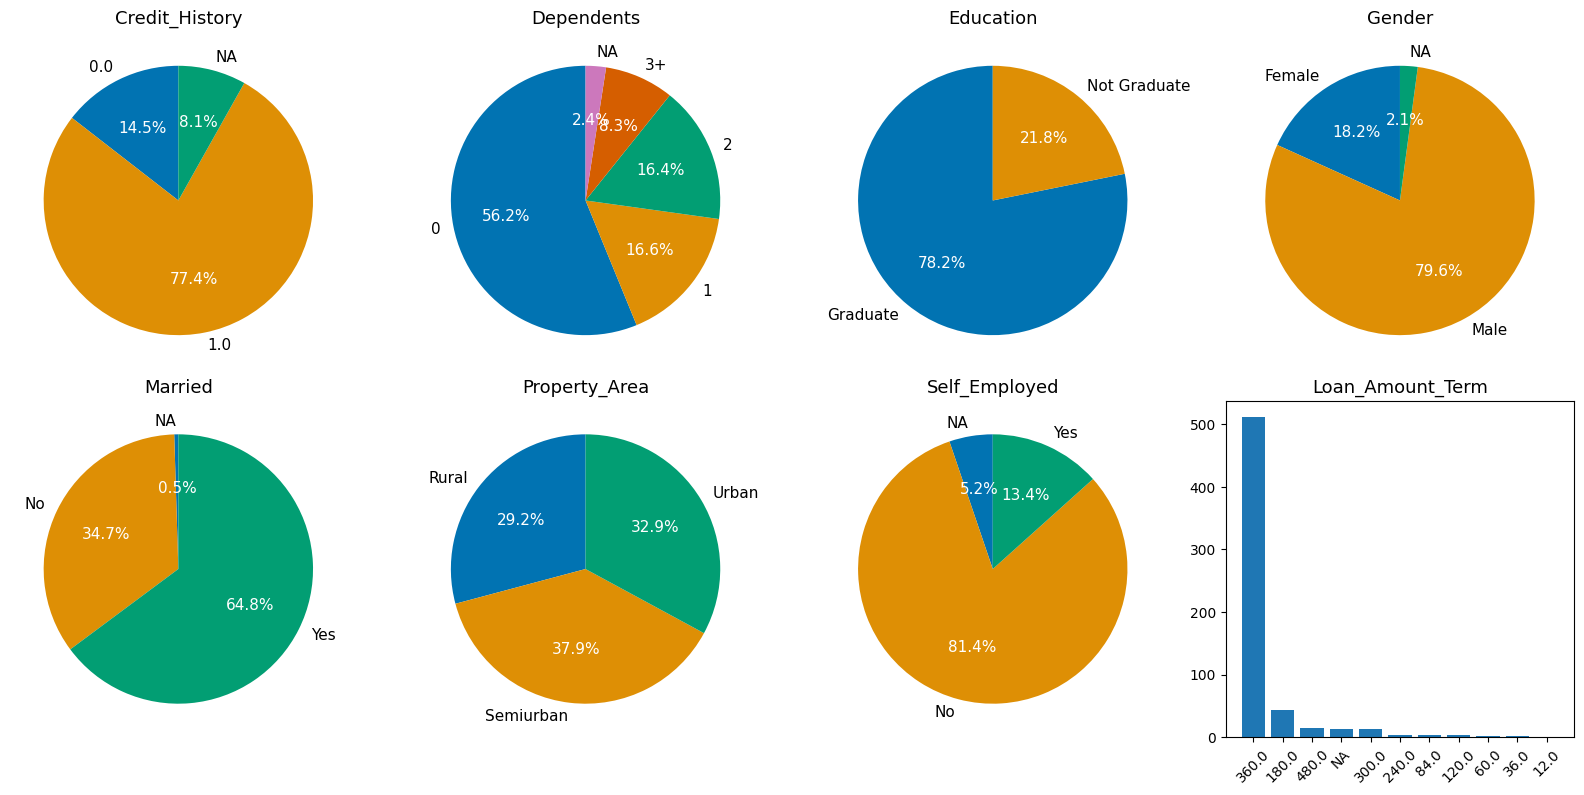

In [ ]:
visualise_categorical(train, categorical_features)

Visualising numerical/continuous data in the train dataset.

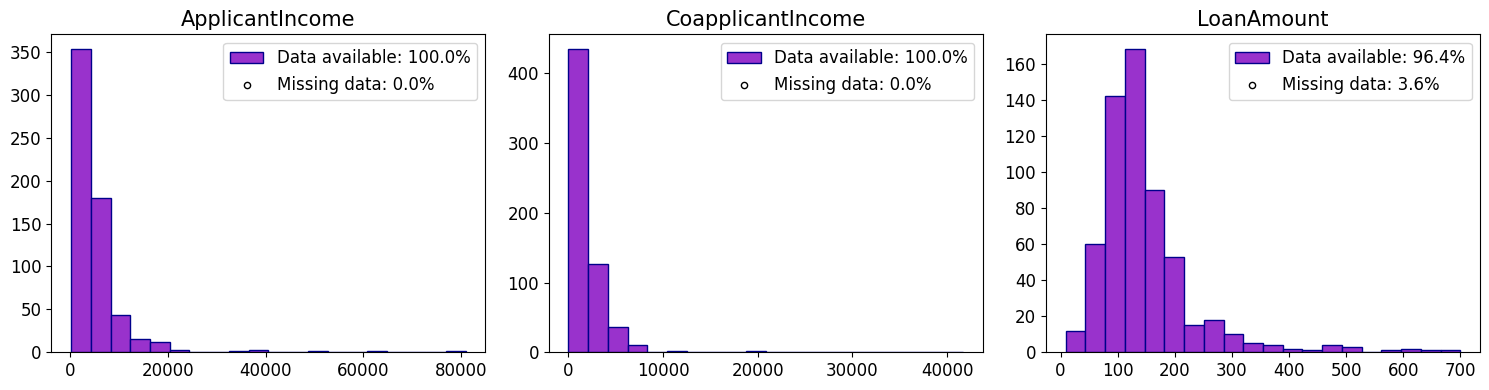

In [ ]:
visualise_continuous(train, continuous_features)

Visualising categorical data in the test dataset.

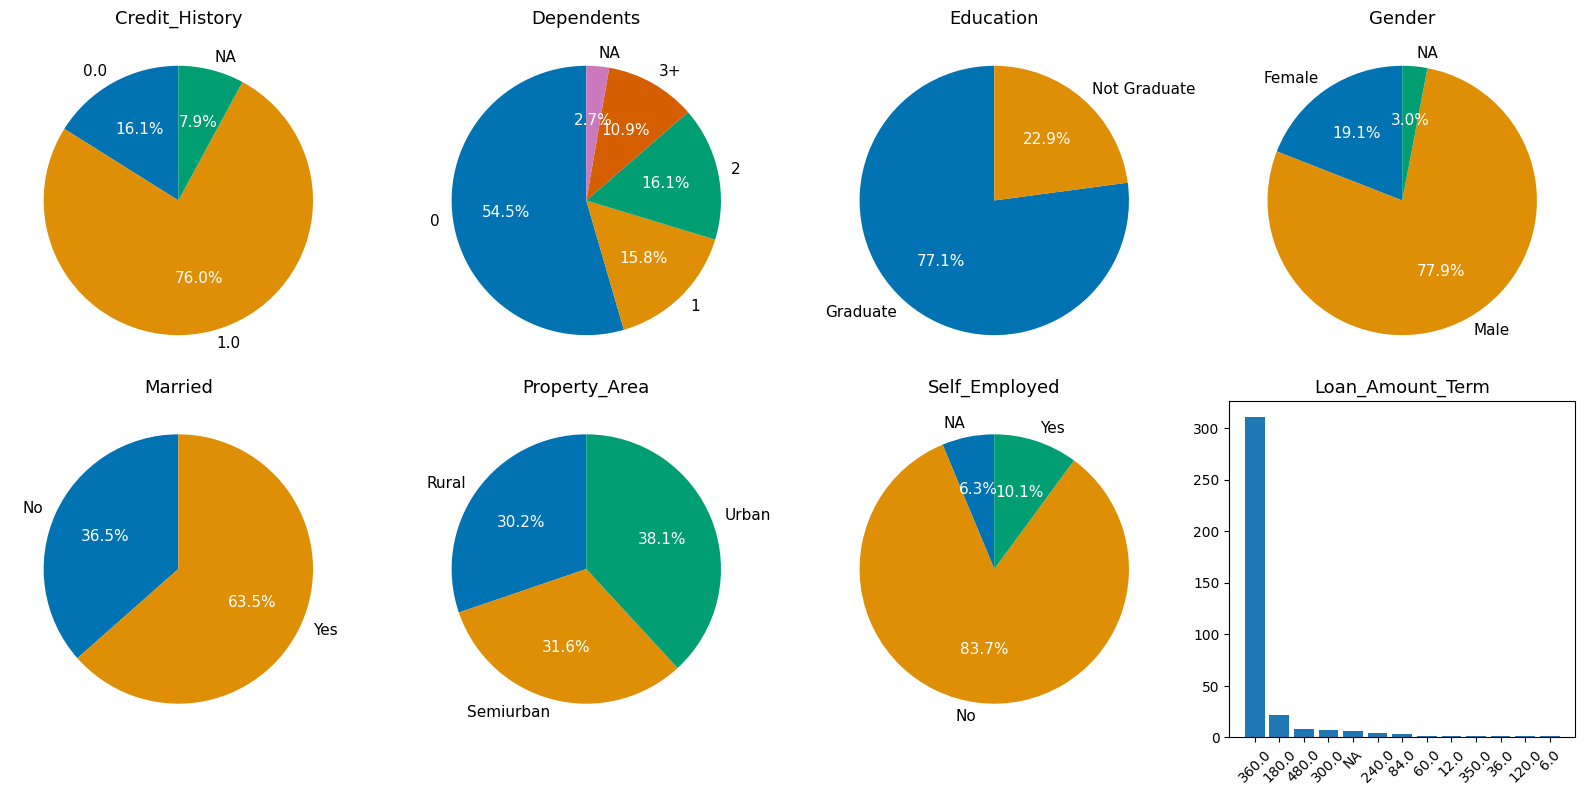

In [ ]:
visualise_categorical(test, categorical_features)

Visualising numerical/continuous data in the test dataset.

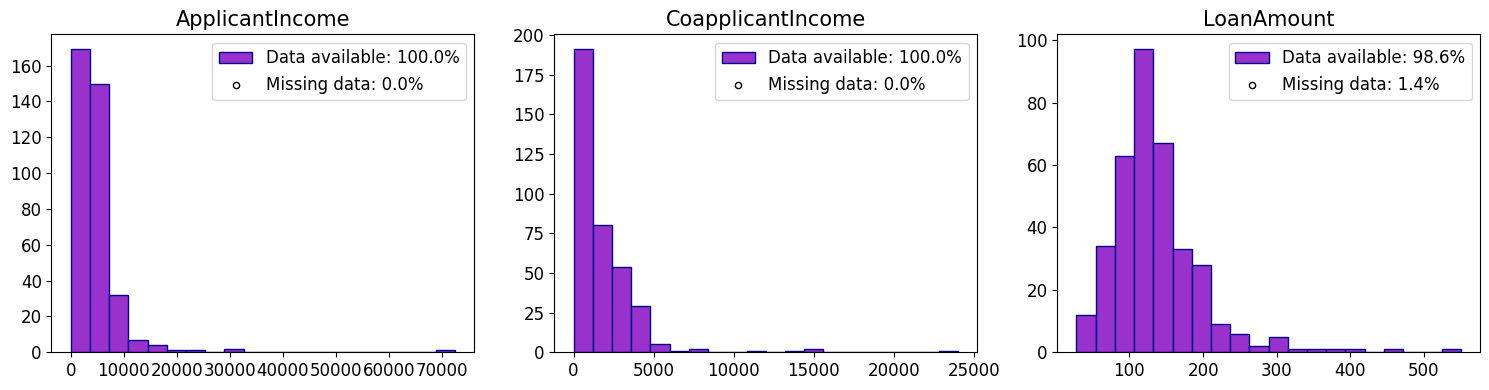

In [ ]:
visualise_continuous(test, continuous_features)

From the above visualisations, it can be observed that for categorical variables, one category always outnumbers the others. Starting alphabetically, there are more applicants with credit history than not. Majority of the applicants have no dependents and are graduates. More than 75% of the applicants are male and more than half of all applicants are also married. Very few applicants (~20%) are self employed. The region of residence appears to be quite evenly spread among all applicants. Most of the applicants prefer the longest term to repay their loans. Going by the observations, an average applicant will be male, educated to a graduate level, married but no dependants, with employment and a credit history.


In the numerical data visualisations, we see that the primary applicant on average has a higher income than the co-applicant. All the 3 distributions are right skewed but the distribution for the loan amount has a well visible peak between 100 and 175 units.

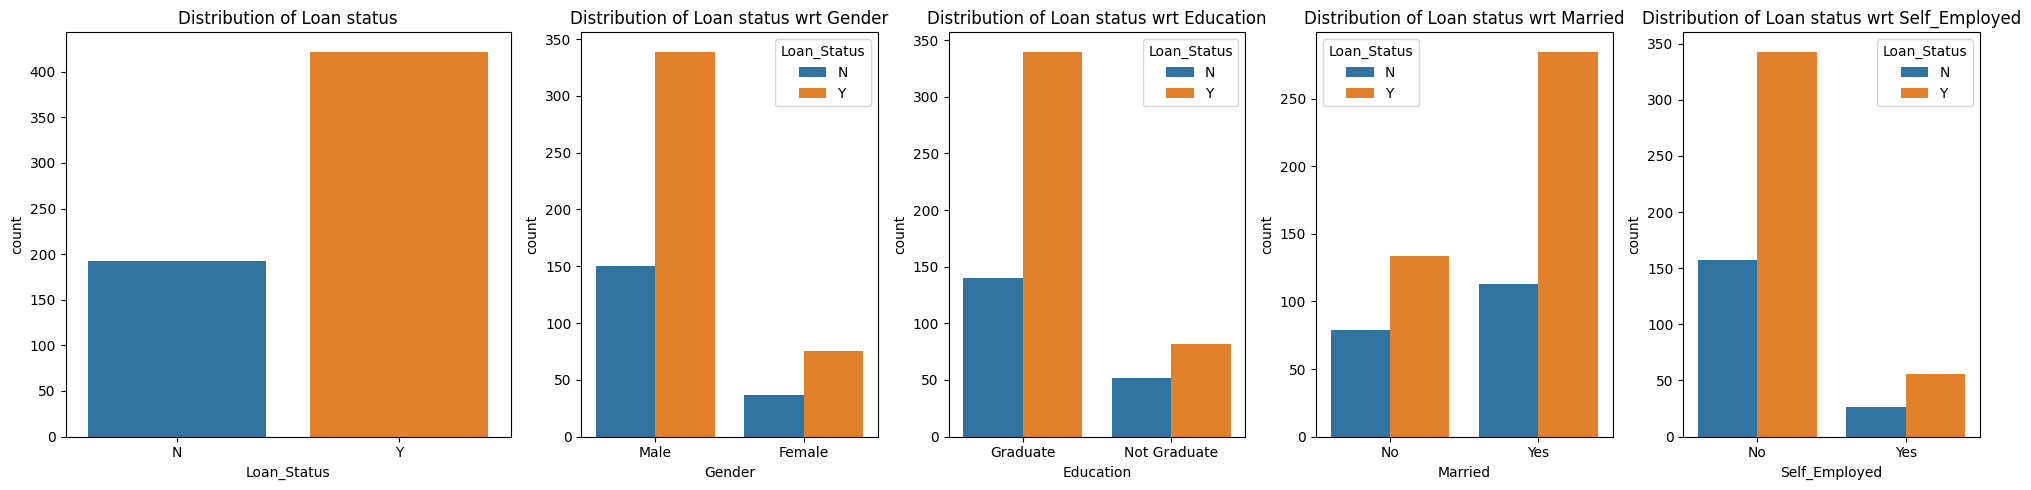

In [ ]:
columnss = ['Gender', 'Education', 'Married', 'Self_Employed']
fig, ax = plt.subplots(1, 5, figsize=(20, 5), gridspec_kw={'width_ratios': [1.5, 1, 1, 1, 1]})

for i in range(5):
    if i==0:
        sns.countplot(train, x='Loan_Status', ax=ax[i])
        ax[i].set_title("Distribution of Loan status")

    else:
        sns.countplot(train, x=columnss[i-1], hue='Loan_Status', ax=ax[i])
        ax[i].set_title(f"Distribution of Loan status wrt {columnss[i-1]}")


plt.tight_layout()
plt.show()

The number of approved loans is almost double of those not approved as can be seen from the first bar plot. Additional visualisations have been provided to observe the loan status with respect to some of the categorical variables. As expected, the dominant applicant category has the bigger share of applications. Additionally, the number of approved loans for all categories is always greater than those not approved but by different margins. In other terms, the approved to unapproved ratio is always greater than 1 but varies within a considerable range.

In [ ]:
dep_counts = train.groupby(['Dependents'], as_index=False).count()[['Dependents', 'Loan_ID']]
dep_counts = dep_counts.rename(columns={'Loan_ID': 'Count'})
dep_counts

,Dependents,Count
0,0,345
1,1,102
2,2,101
3,3+,51


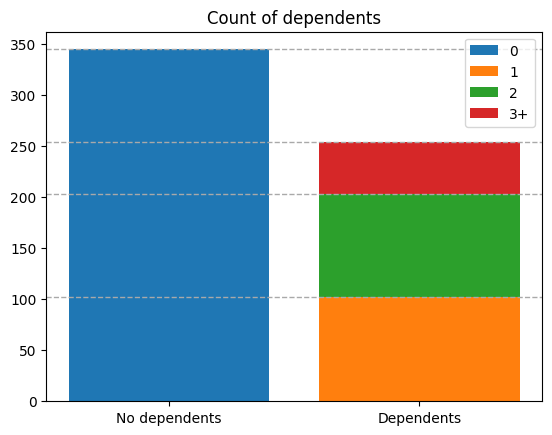

In [ ]:
for dep in dep_counts.index:
    if dep_counts['Dependents'].loc[dep]=='0':
        plt.bar(1, dep_counts['Count'].loc[dep], label=dep_counts['Dependents'].loc[dep])
    elif dep_counts['Dependents'].loc[dep]=='1':
        plt.bar(2, dep_counts['Count'].loc[dep], label=dep_counts['Dependents'].loc[dep])
    elif dep_counts['Dependents'].loc[dep]=='2':
        plt.bar(2, dep_counts['Count'].loc[dep], bottom=dep_counts['Count'].loc[dep-1], label=dep_counts['Dependents'].loc[dep])
    else:
        plt.bar(2, dep_counts['Count'].loc[dep], bottom=dep_counts['Count'].loc[dep-1]+dep_counts['Count'].loc[dep-2], label=dep_counts['Dependents'].loc[dep])

plt.xticks(ticks=[1,2], labels=['No dependents', 'Dependents'])
counts = dep_counts['Count']
for cts in [counts[0], counts[1], counts[1]+counts[2], counts[1]+counts[2]+counts[3]]:
    plt.axhline(y=cts, linestyle='dashed', linewidth=1, color='darkgrey')
plt.title("Count of dependents")
plt.legend()
plt.show()

From the barplot, we can see that 345 applicants do not have dependents. Whereas 102 have 1 dependent, 101 have 2 dependents and 51 have 3 or more dependents.

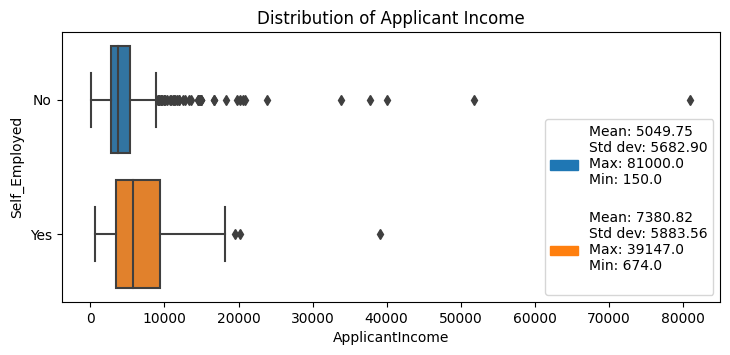

In [ ]:
plt.figure(figsize=(8.5,3.5))

ax = sns.boxplot(train, y='Self_Employed', x='ApplicantIncome', orient='horizontal')

statistics = train.groupby('Self_Employed').describe().ApplicantIncome


legend_handles = []
legend_labels = []
for i in statistics.index:
    color = sns.color_palette()[list(statistics.index).index(i)]
    patch = mpatches.Patch(color=color)
    legend_handles.append(patch)
    legend_labels.append(f"Mean: {statistics['mean'].loc[i]:.2f}\nStd dev: {statistics['std'].loc[i]:.2f}\nMax: {statistics['max'].loc[i]}\nMin: {statistics['min'].loc[i]}\n")


ax.legend(handles=legend_handles, labels=legend_labels, loc='lower right')

plt.title("Distribution of Applicant Income")
plt.show()

The above boxplot is of the applicant income stratified by employment category, i.e. employed or self-employed. It can be observed that the maximum income is higher for an employed applicant but the boxplot shows that on average, a self employed applicant earns more. Such that the second quarile of the income for employed class almost coincides with the first quartile of the self employed class. If this difference in income is significant or not can be tested by a hypothesis test as done below.

In [ ]:
emp_income = list(train[train['Self_Employed']=='No'].ApplicantIncome)
semp_income = list(train[train['Self_Employed']=='Yes'].ApplicantIncome)

p_values = []

for _ in range(10):
    ser1 = random.sample(emp_income, 50)
    ser2 = random.sample(semp_income, 50)

    t_statistic, p_value = stats.ttest_ind(ser1, ser2, equal_var=False, alternative='less', )

    p_values.append(p_value)

found = 0

for p in p_values:
    if p<0.05/10:
        print("On average income of self employed applicants is more than that of employed applicants")
        found = 1
        break

if found==0:
    print("On average income of self employed applicants is not different from that of employed applicants")

On average income of self employed applicants is more than that of employed applicants


At a 5% significance level, we conducted the following hypothesis test to determine if there is a significant difference between two groups.
H0: There is no difference on average between the income of an employed and a self employed applicant.
H1: The income of the employed applicnt on average is less than that of a self employed applicant.

Based on the test results, we have enough evidence to reject the null hypothesis. This means that there is strong evidence to suggest that the income of a self employed applicant is higher on average. In other words, the data supports the idea that there is a real difference and it is unlikely that it is due to mere chance.

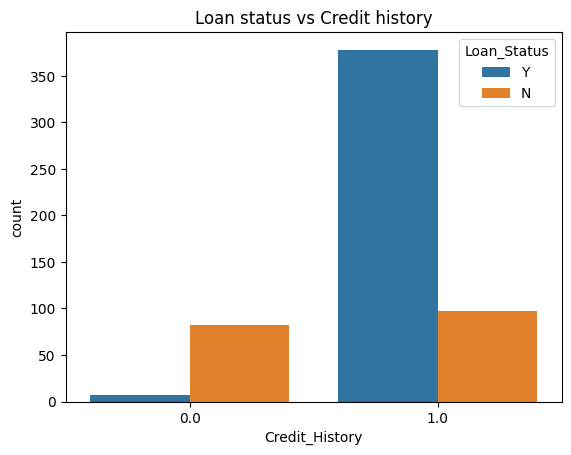

In [ ]:
sns.countplot(train, x='Credit_History', hue='Loan_Status')
plt.title("Loan status vs Credit history")
plt.show()

In [ ]:
prob1 = round((len(train[(train['Credit_History']==1)&(train['Loan_Status']=='Y')])/len(train[train['Credit_History']==1]))*100, 2)
prob2 = round((len(train[(train['Credit_History']==0)&(train['Loan_Status']=='Y')])/len(train[train['Credit_History']==0]))*100, 2)

print(f"Chances of having loan approved upon having credit history is greater by {prob1-prob2}%")

Chances of having loan approved upon having credit history is greater by 71.71%


While it is difficult to state whether an applicant without credit history will default on a loan or not due to lack of data, we can conclude from the above visualisation that the chance of getting a loan application approved is remarkably high (almost 72% higher) in the presence of credit history than in its absence.

In [ ]:
df1 = train[['ApplicantIncome', 'LoanAmount']]
df2 = test[['ApplicantIncome', 'LoanAmount']]

for_corr = pd.concat([df1,df2]).dropna().reset_index(drop=True)

In [ ]:
req_corr = for_corr['ApplicantIncome'].corr(for_corr['LoanAmount'])
print(f"Correlation between applicant income and loan amount applied for is {req_corr:.02f}")

Correlation between applicant income and loan amount applied for is 0.55


In [ ]:
coeff, p_value = stats.pearsonr(for_corr['ApplicantIncome'], for_corr['LoanAmount'])
if p_value<0.05:
    print("Correlation is significant")
else:
    print("Correlation is not significant")

Correlation is significant


There is medium positive correlation between an applicant's income and the loan amount (0.55). The significance of this correlation can also be verified by a hypothesis test. A Pearson's test performed at 5% significance level determined the correlation to be significant.

# Data modelling

### Auto ML wth autosklearn


In [ ]:
# Matrix of features

X = train[['Gender',
'Married',
'Dependents',
'Education',
'Self_Employed',
'ApplicantIncome',
'CoapplicantIncome',
'LoanAmount',
'Loan_Amount_Term',
'Credit_History',
'Property_Area']]

# convert string(text) to categorical
X['Gender'] = X['Gender'].astype('category')
X['Married'] = X['Married'].astype('category')
X['Education'] = X['Education'].astype('category')
X['Dependents'] = X['Dependents'].astype('category')
X['Self_Employed'] = X['Self_Employed'].astype('category')
X['Property_Area'] = X['Property_Area'].astype('category')


# label encode target
y = train['Loan_Status'].map({'N':0,'Y':1}).astype(int)


# # train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train
autoML = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=2*30, per_run_time_limit=30, n_jobs=8) # imposing a 1 minute time limit on this
autoML.fit(X_train, y_train)

# predict
predictions_autoML = autoML.predict(X_test)

In [ ]:
print('Model Accuracy:', accuracy_score(predictions_autoML, y_test))

Model Accuracy: 0.7886178861788617


In [ ]:
print(confusion_matrix(predictions_autoML, y_test))

[[18  1]
 [25 79]]


              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



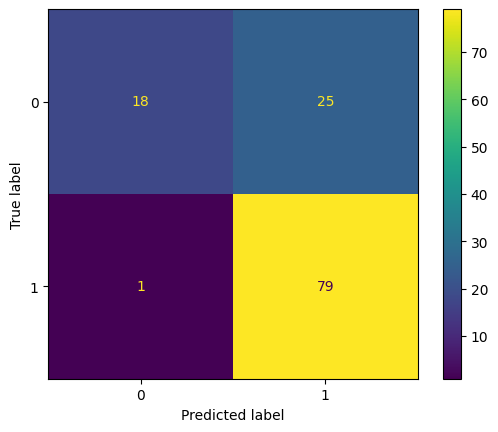

In [ ]:
print(classification_report(y_test, predictions_autoML))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, predictions_autoML)).plot()
plt.show()

Auto sklearn is an amazing library that does a great job at classifying the datapoints. Although it classifies 18 approved applications correctly, it misclassifies 25 applications meant to be rejected as approved. This is rather risky for the Bank as it may approve loans to applicants who do not qualify. In such scenarios, a data model has to be fine-tuned to perform as per expectations.

## Bespoke ML sklearn

### Data Preparation

In [ ]:
# importing a few more libraries for machine learning

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from distfit import distfit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
features = list(train.columns.values)
features.remove('Loan_ID')
features.remove('Loan_Status')
features

labels = ['Loan_Status']

# splitting the dataset into features an labels

X = train[features]
y = train[labels]

#### Impute missing categorical values

As we saw before that in most categorical variables, one category always outnumbered the others. This can be leveraged to impute missing categorical data. By using the mode of the series.

In [ ]:
X.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [ ]:
null_category = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

for feature in null_category:
    X[feature] = X[feature].fillna(stats.mode(X[feature])[0][0])

In [ ]:
for feat in categorical_features:

    if X[feat].dtype=="float64":
        X[feat] = X[feat].astype('int')

    if X[feat].dtype=="O":
        abc = [k for k in X[feat].unique() if k==k]
        abc = list(enumerate(abc))
        mapper = {}
        for tup in abc:
            mapper[tup[1]] = tup[0]

        X[feat] = X[feat].apply(lambda x: int(mapper[x]) if pd.notnull(x) else x)


#### Impute missing loan amount

Imputing missing loan amount data is a bit different. It can be regarded as a smaller regression task. To tackle this, we split the features dataset into rows that contain a valid loan amount value and rows that do not contain the value. We train a simple K-neighbours regressor on the rows that have the values and use it to predict the missing loan amount values.

In [ ]:
loan_tr = X[X['LoanAmount'].notna()]
loan_ts = X[X['LoanAmount'].isna()]

In [ ]:
x_loan_tr = loan_tr[[x for x in loan_tr.columns.values if x!='LoanAmount']]
y_loan_tr = loan_tr['LoanAmount']

x_loan_ts = loan_ts[[x for x in loan_ts.columns.values if x!='LoanAmount']]


In [ ]:
impt_model = KNeighborsRegressor(n_neighbors=3)

impt_scaler = MinMaxScaler()
x_loan_tr = impt_scaler.fit_transform(x_loan_tr)
x_loan_ts = impt_scaler.transform(x_loan_ts)

impt_model.fit(x_loan_tr, y_loan_tr)

impt_pred = impt_model.predict(x_loan_ts)

In [ ]:
loan_ts['LoanAmount'] = impt_pred

for id in loan_ts.index:
    X['LoanAmount'].loc[id] = loan_ts['LoanAmount'].loc[id]

X.isna().sum()      # verfying that all missing values have been inputed

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
# label encoding without LabelEncoder. Labels have been specifically encoded where 0 means N and 1 means Y

label_mapper = {'N':0,'Y':1}
y['Loan_Status'] = y['Loan_Status'].apply(lambda x: label_mapper[x])

In [ ]:
y['Loan_Status'] = y['Loan_Status'].astype('category')
Counter(y['Loan_Status'])       # counting number of Ys and Ns. Displays an imbalance in samples.

Counter({1: 422, 0: 192})

In [ ]:
for feat in categorical_features:
    X[feat] = X[feat].astype('category')


X = pd.get_dummies(X, columns = categorical_features)       # faster alternative to one-hot encoding of features
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History_0,Credit_History_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,...,Loan_Amount_Term_12,Loan_Amount_Term_36,Loan_Amount_Term_60,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480
0,5849,0.0,148.333333,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,4583,1508.0,128.000000,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3000,0.0,66.000000,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2583,2358.0,120.000000,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6000,0.0,141.000000,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
610,4106,0.0,40.000000,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
611,8072,240.0,253.000000,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
612,7583,0.0,187.000000,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting X and y into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()     # Scaling the features using min-max scaler to preserve the 0 - 1 values of once hot encoded features. Observed to give better results than standard scaler in this case.

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Data modeling

#### Base model

In [ ]:
model = SVC()       # using support vector classifier for this task.

model.fit(X_train, y_train)

y_prediction = model.predict(X_test)
print(accuracy_score(y_prediction, y_test))

0.7886178861788617


              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



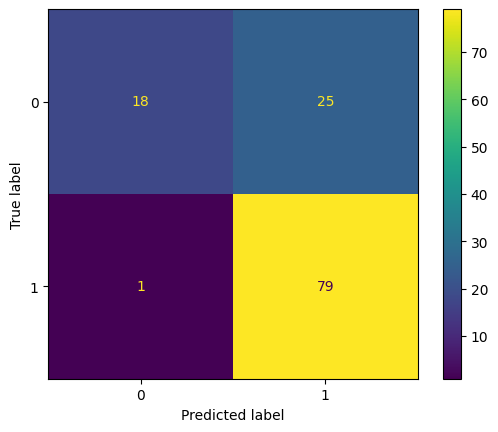

In [ ]:
print(classification_report(y_test, y_prediction))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_prediction)).plot()
plt.show()

The base model with default parameters performs exactly the same as auto-sklearn. Next we will try hyperparameter tuning with 3 fold cross validation to try and obtain better results.

In [ ]:
# parameter values to be tested

C = np.linspace(0.1, 2, 20)
gamma = ['scale', 'auto']
kernel = ['linear', 'rbf', 'poly']
degree = [2,3,4,5,6]
class_weight = [None, 'balanced']

grid = {'C': C,
        'gamma': gamma,
        'kernel': kernel,
        'degree': degree,
        'class_weight': class_weight}

#### Grid search cv

In [ ]:
gridsearch1 = GridSearchCV(estimator=SVC(), param_grid=grid, cv=3, scoring='f1_weighted', verbose=0)
gridsearch1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1_weighted')

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



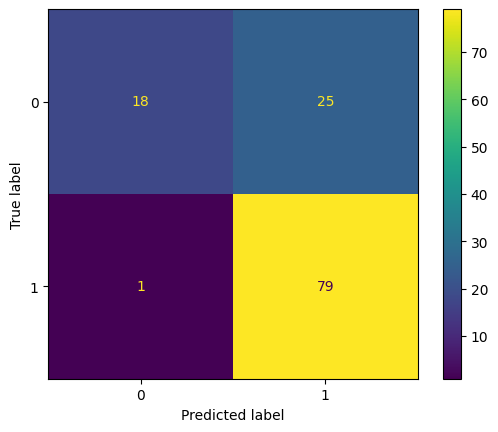

In [ ]:
model = gridsearch1.best_estimator_
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

The performance did not improve even after hyperparameter tuning. The scoring method used was f1-weighted. The reason for this could be the imbalance in data samples for Y (1) and N (0). It can be seen that the 1s are predicted a lot better than the 0s and since the 1s are large in number, it is giving a high accuracy value. But we want to increase the correct classification of the 0s.

#### Grid search Cv + OS + US

To improve the classification of the minority class, we turn towards a technique called minority oversampling and majority undersampling. In this, we use a library called SMOTE to oversample the minority classes (0) that use KNN clustering and a RandomUnderSampler class to reduce the samples for the majority class (1) in an attempt to reduce the imbalance between the samples. Following this, a grid search cv has ben performed again.

In [ ]:
oversampler = SMOTE(sampling_strategy=0.6, k_neighbors=2)
undersampler = RandomUnderSampler(sampling_strategy=0.7)

print('Before synthetic oversampling: ', Counter(y_train['Loan_Status']))

X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

print('After oversampling minority class: ', Counter(y_train_os['Loan_Status']))

X_train_os_us, y_train_os_us = undersampler.fit_resample(X_train_os, y_train_os)

print('After undersampling majority class: ', Counter(y_train_os_us['Loan_Status']))

Before synthetic oversampling:  Counter({1: 342, 0: 149})
After oversampling minority class:  Counter({1: 342, 0: 205})
After undersampling majority class:  Counter({1: 292, 0: 205})


In [ ]:
gridsearch2 = GridSearchCV(estimator=SVC(), param_grid=grid, cv=3, scoring='f1_weighted', verbose=0)
gridsearch2.fit(X_train_os_us, y_train_os_us)


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1_weighted')

              precision    recall  f1-score   support

           0       0.52      0.58      0.55        43
           1       0.76      0.71      0.74        80

    accuracy                           0.67       123
   macro avg       0.64      0.65      0.64       123
weighted avg       0.68      0.67      0.67       123



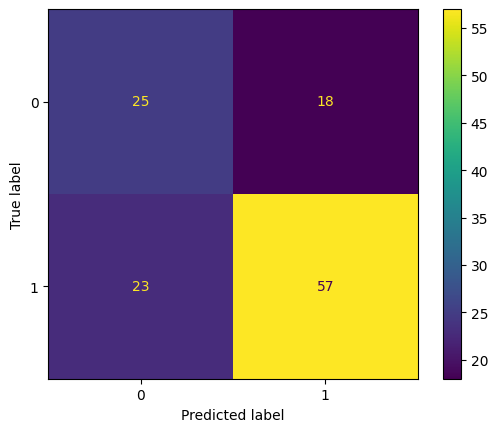

In [ ]:
model = gridsearch2.best_estimator_
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred)).plot()
plt.show()

In [ ]:
print(confusion_matrix(y_pred, y_test))

[[25 23]
 [18 57]]


There is some visible improvement. The model was now able to predict 7 more minority data points correctly from the validation set. A trade-off of this technique is it also reduces the correct classification of the majority class. But the results obtained contain lesser risk than those obtained before as it can now better identify potential defaulters in loan applications.

### Summary

From the above analysis of auto libraries an bespoke methods for EDA and classification, it can be concluded that while automatic methods are faster to implement and derive results from, it is a very generalised solution. For specific problems with more specific targets, it is often better to use bespoke data analysis techniques to minimise risk and obtain better results as it provides a certain flexibility to analysis that can be missing in automatic methods.